In [72]:
# import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from PIL import Image
import os
import math


In [73]:
interpreter = tf.lite.Interpreter(model_path = r'movenet.tflite')
interpreter.allocate_tensors()

Flipping Training Images

In [74]:


def flip_images(input_dir, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Loop through all the files in the input directory
    for filename in os.listdir(input_dir):
        # Construct the full file path
        img_path = os.path.join(input_dir, filename)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            # Open the image
            img = Image.open(img_path)
            
            # Flip the image horizontally
            flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
            
            # Save the flipped image to the output directory
            flipped_img.save(os.path.join(output_dir, filename+'_flipped.jpg'))
            print(f"Flipped and saved: {filename}")

# Example usage:
input_directory_up = r'upPosition'
output_directory_up = r'upPosition'

flip_images(input_directory_up, output_directory_up)


Flipped and saved: 0_960x540.jpg
Flipped and saved: 0_960x540.jpg_flipped.jpg
Flipped and saved: 1000s.jpg
Flipped and saved: 1000s.jpg_flipped.jpg
Flipped and saved: 2potEB8qNMABrHqjfWIpOOvbyAbsNmbLb7_SAM9jEQE.jpg
Flipped and saved: 362-1.jpg
Flipped and saved: 362-1.jpg_flipped.jpg
Flipped and saved: 50984454-young-sportsman-in-gym-strong-guy-standing-with-barbell-in-gym-man-working-out-in-gym-on-the.jpg
Flipped and saved: 50984454-young-sportsman-in-gym-strong-guy-standing-with-barbell-in-gym-man-working-out-in-gym-on-the.jpg_flipped.jpg
Flipped and saved: 524.jpg
Flipped and saved: 524.jpg_flipped.jpg
Flipped and saved: 6181ae52a3e0153fba71466fc28cb1fc595b4647_720.jpg
Flipped and saved: 6181ae52a3e0153fba71466fc28cb1fc595b4647_720.jpg_flipped.jpg
Flipped and saved: 75-1.jpg
Flipped and saved: 75-1.jpg_flipped.jpg
Flipped and saved: Barbell-Back-Squat.jpg
Flipped and saved: Barbell-Back-Squat.jpg_flipped.jpg
Flipped and saved: Blog-Image-7-STANDING-AB-EXERCISES-THAT-WILL-STRENGTHEN-

In [75]:
from PIL import Image
import os

Dataframe of landmarks of the training Images

In [101]:
def landmarks_from_standing_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(0)
    return X,Y

def landmarks_from_squating_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            print(file)

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(1)
    return X,Y
            

In [102]:
X,Y = landmarks_from_standing_images(r'upPosition',[],[])

In [103]:
link = r'downPosition'
X2,Y2 = landmarks_from_squating_images(link, X, Y)

108616824.jpg
30-day-squat-challenge-lead-1588712943.png
6-Ways-Youre-Squatting-Wrong-GettyImages-965003092-2000-3a55ad0afb9746259beba30c7603e9b8.jpg
6-Ways-Youre-Squatting-Wrong-GettyImages-965003092-2000-3a55ad0afb9746259beba30c7603e9b8.jpg_flipped.jpg
9.jpg
9.jpg_flipped.jpg
Barbell-Back-Squat-1109.jpg
Barbell-squat.jpg
barbell_squat.jpg
basic-squat.jpg
basic-squat.jpg_flipped.jpg
build-a-better-squat-1.jpg
build-a-better-squat-1.jpg_flipped.jpg
front-squat-tile-01.jpg
GettyImages-713857713-b057bc895fc44b8ea1f6bdf4dd2f0ed2.jpg
How-To-Properly-Perform-Squats-736x491.jpg
image.jpg
image.jpg_flipped.jpg
images.jpeg
img_8161.jpg
img_8161.jpg_flipped.jpg
istockphoto-543051434-612x612.jpg
Jamie-squat.jpg
Jamie-squat.jpg_flipped.jpg
KW_YogaHiit-14.jpg
KW_YogaHiit-14.jpg_flipped.jpg
man-kettlebell-goblet-squat-1109.jpg
man-kettlebell-goblet-squat-1109.jpg_flipped.jpg
online-pilates-girl-laptop-exercise-260nw-2460677859.jpg
online-pilates-girl-laptop-exercise-260nw-2460677859.jpg_flipped.jpg

In [105]:

# Generate column names
columns = [f"{i}_x" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + [f"{i}_y" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + ['Y']

# Create an empty DataFrame with these columns
df = pd.DataFrame(columns=columns)

# Display the DataFrame to verify
print(df)

Empty DataFrame
Columns: [6_x, 7_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 6_y, 7_y, 12_y, 13_y, 14_y, 15_y, 16_y, 17_y, Y]
Index: []


In [106]:
df = pd.DataFrame(columns=columns)

y = 0
for entry in X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (7,6,13,12,15,14,17,16):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = Y[y]
    y = y+1
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\923337779.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


In [107]:
df_landmarks = df

In [108]:
df_landmarks.to_csv('squatTrainSet.csv', index = False)

In [109]:
df_landmarks = pd.read_csv('squatTrainSet.csv')

In [110]:
df_angles= pd.DataFrame(columns=['right_upper','left_upper','right_bottom','left_bottom','Y'])

In [111]:
df_landmarks.corr()

,6_x,7_x,12_x,13_x,14_x,15_x,16_x,17_x,6_y,7_y,12_y,13_y,14_y,15_y,16_y,17_y,Y
6_x,1.000000,0.977997,0.727445,0.723783,-0.583492,-0.582724,-0.590100,-0.583063,-0.045860,0.091275,-0.039519,-0.026313,0.081730,0.018342,-0.058386,0.057951,0.568391
7_x,0.977997,1.000000,0.719750,0.732496,-0.579354,-0.588644,-0.582935,-0.593333,-0.078834,0.058004,-0.008692,0.000942,0.062407,-0.002456,-0.035282,0.080209,0.582924
12_x,0.727445,0.719750,1.000000,0.990144,-0.418662,-0.419415,-0.168891,-0.166212,-0.007312,0.081149,0.017257,0.040108,0.166422,-0.069722,-0.012381,0.066812,0.652120
13_x,0.723783,0.732496,0.990144,1.000000,-0.432711,-0.421091,-0.187396,-0.165362,-0.031364,0.042469,-0.012976,0.001249,0.173869,-0.074400,-0.025835,0.043041,0.662778
14_x,-0.583492,-0.579354,-0.418662,-0.432711,1.000000,0.943411,0.805554,0.712691,0.056367,-0.045742,0.112666,0.146939,-0.173868,0.021478,0.066951,0.053787,-0.726774
15_x,-0.582724,-0.588644,-0.419415,-0.421091,0.943411,1.000000,0.740759,0.788334,0.008659,-0.072696,-0.048223,-0.004241,-0.146536,0.079049,-0.051006,-0.039603,-0.729769
16_x,-0.590100,-0.582935,-0.168891,-0.187396,0.805554,0.740759,1.000000,0.844170,0.191131,-0.081761,0.238876,0.166214,0.048958,-0.138768,0.229547,0.008494,-0.367386
17_x,-0.583063,-0.593333,-0.166212,-0.165362,0.712691,0.788334,0.844170,1.000000,0.097842,-0.174202,-0.070488,-0.141840,0.101760,-0.095186,-0.002075,-0.222420,-0.357710
6_y,-0.045860,-0.078834,-0.007312,-0.031364,0.056367,0.008659,0.191131,0.097842,1.000000,0.280146,0.664154,0.367807,0.784816,0.004853,0.828002,0.202536,0.010679
7_y,0.091275,0.058004,0.081149,0.042469,-0.045742,-0.072696,-0.081761,-0.174202,0.280146,1.000000,0.367952,0.676199,0.043283,0.781354,0.247514,0.853538,-0.037109


In [112]:
def calculate_angles(a, b, c):
    
    # Vectors from points
    vec_1 = [a[0] - b[0], a[1] - b[1]]
    vec_2 = [c[0] - b[0], c[1] - b[1]]
    
    # Dot product
    dot_product = vec_1[0] * vec_2[0] + vec_1[1] * vec_2[1]
    
    # Magnitudes of the vectors
    mag_1 = math.sqrt(vec_1[0]**2 + vec_1[1]**2)
    mag_2 = math.sqrt(vec_2[0]**2 + vec_2[1]**2)
    
    # Angle in radians
    angle_rad = math.acos(dot_product / (mag_1 * mag_2))
    
    # Convert to degrees
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg


In [113]:
def angle_dataframe(df):
    df_angles= pd.DataFrame(columns=['right_upper','left_upper','right_bottom','left_bottom','Y'])
    angles_list = []
    for index,row in df.iterrows():
        right_shoulder = [row['7_x'],row['7_y']]
        right_hip = [row['13_x'],row['13_y']]
        right_knee = [row['15_x'],row['15_y']]
        right_foot = [row['17_x'],row['17_y']]
        left_shoulder = [row['6_x'],row['6_y']]
        left_hip = [row['12_x'],row['12_y']]
        left_knee = [row['14_x'],row['14_y']]
        left_foot = [row['16_x'],row['16_y']]
        right_upper_angle = calculate_angles(right_shoulder,right_hip,right_knee)
        left_upper_angle = calculate_angles(left_shoulder,left_hip,left_knee)
        right_lower_angle = calculate_angles(right_hip,right_knee,right_foot)
        left_lower_angle = calculate_angles(left_hip,left_knee,left_foot)

        # Assuming 'Y' is a label or some other value from the original DataFrame row
        Y = row['Y']
        
        # Append the angles to the new DataFrame
        angles_list.append({
            'right_upper': right_upper_angle,
            'left_upper': left_upper_angle,
            'right_bottom': right_lower_angle,
            'left_bottom': left_lower_angle,
            'Y': Y
        })
    df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)
    return df_angles

In [114]:
df_angles = angle_dataframe(df_landmarks)

C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\2825275131.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [115]:
print(df_angles)

     right_upper  left_upper  right_bottom  left_bottom    Y
0     165.890187  178.044279    177.993928   177.172306  0.0
1     169.984679  169.043878    178.841289   176.975764  0.0
2     163.095933  163.372900    172.202647   176.578340  0.0
3     163.578784  165.703268    175.977890   172.906195  0.0
4     162.396560  162.982445    178.533264   175.158529  0.0
..           ...         ...           ...          ...  ...
124    79.951247   53.196218     98.411526    61.660076  1.0
125    59.963328   65.952780     88.869255    90.096698  1.0
126   101.351768   74.570182    116.744825    85.037496  1.0
127    52.883816   60.771892     37.613128    47.042023  1.0
128    55.874039   48.930565     45.254505    34.365860  1.0

[129 rows x 5 columns]


In [116]:
x_cols = [col for col in df_angles.columns.to_list() if col != "Y"]
print(x_cols)
x_df = df_angles[x_cols]
y_df = df_angles[['Y']]

['right_upper', 'left_upper', 'right_bottom', 'left_bottom']


In [117]:
y_df['Y'] = y_df['Y'].astype('int')

C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\2561977078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['Y'] = y_df['Y'].astype('int')


In [118]:
y_df.dtypes

Y    int32
dtype: object

In [162]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])
opti = Adam(learning_rate = 0.00007)
# Compile the model
model.compile(optimizer=opti,
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(x_df, y_df, epochs=400, validation_split=0.2)  # Adjust epochs as needed

# Save the model in a format suitable for TensorFlow Lite
model.save('model.h5')

Epoch 1/400


c:\Users\2001l\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6825 - loss: 13.4116 - val_accuracy: 0.0000e+00 - val_loss: 37.8798
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6721 - loss: 13.6143 - val_accuracy: 0.0000e+00 - val_loss: 36.9828
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7065 - loss: 12.2577 - val_accuracy: 0.0000e+00 - val_loss: 36.0904
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6690 - loss: 12.9882 - val_accuracy: 0.0000e+00 - val_loss: 35.1955
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7055 - loss: 11.1093 - val_accuracy: 0.0000e+00 - val_loss: 34.3103
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6732 - loss: 12.2988 - val_accuracy: 0.0000e+00 - val_loss: 33.4194
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7242 - loss: 9.7101 - val_accuracy: 0.0000e+00 - val_loss: 32.5703
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6825 - loss: 10.8114 - val_

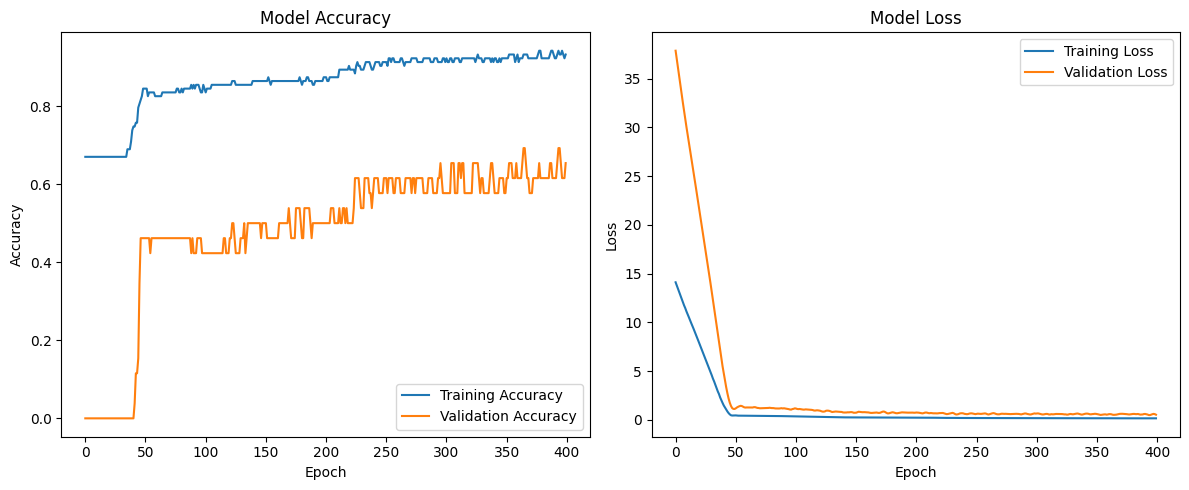

In [163]:

import matplotlib.pyplot as plt

# Save the model in a format suitable for TensorFlow Lite
model.save('model.h5')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\2001l\AppData\Local\Temp\ipykernel_10480\2340584429.py:1: SyntaxWarning: invalid escape sequence '\p'
  model = tf.keras.models.load_model('D:\pose_detection\pose-detection\ModelTraining\model.h5')


In [164]:
def landmarks_from_squating_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(1)
    return X,Y

def landmarks_from_standing_images(input_dir,X,Y):
    for file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, file)
        
        # Check if the file is an image
        if os.path.isfile(img_path) and file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img = Image.open(img_path)
            img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
            input_image = tf.cast(img, dtype=tf.float32)

            # Setup input and output
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()

            #make predictions
            interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
            interpreter.invoke()
            keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
            landmarks = keypoints_with_scores

            X.append(landmarks)
            Y.append(0)
    return X,Y

def image_prediction(image_path):
    img = Image.open(image_path)
    img = tf.image.resize_with_pad(np.expand_dims(img,axis=0), 192, 192)
    input_image = tf.cast(img, dtype=tf.float32)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #make predictions
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    landmarks = keypoints_with_scores
    return landmarks[0][0]



In [165]:
test_X,test_Y = landmarks_from_squating_images('test images/sit',[],[])
test_X,test_Y = landmarks_from_standing_images('test images/stand',test_X,test_Y)
test2_X, test2_Y = landmarks_from_squating_images('test_2',[],[])

In [166]:
print(test2_X)

[array([[[[0.27491593, 0.75278366, 0.39275256],
         [0.26264724, 0.7397182 , 0.42930257],
         [0.2622417 , 0.7432532 , 0.60537875],
         [0.27359244, 0.6666937 , 0.31570673],
         [0.2731563 , 0.70066845, 0.5343363 ],
         [0.34552357, 0.5720901 , 0.4145658 ],
         [0.33781642, 0.6969709 , 0.58393973],
         [0.45124108, 0.46811897, 0.43803826],
         [0.36775038, 0.73258257, 0.33295736],
         [0.36454958, 0.5541642 , 0.34676754],
         [0.3371403 , 0.7441039 , 0.37836277],
         [0.5633344 , 0.48469126, 0.54858536],
         [0.55741274, 0.5638953 , 0.54783916],
         [0.65291345, 0.6043433 , 0.3223125 ],
         [0.6432204 , 0.7950717 , 0.6584522 ],
         [0.81399107, 0.4950106 , 0.6057353 ],
         [0.85419524, 0.71923184, 0.6389079 ]]]], dtype=float32), array([[[[0.3486262 , 0.5620886 , 0.35761592],
         [0.32728848, 0.5612004 , 0.39814195],
         [0.3256486 , 0.56477535, 0.5950599 ],
         [0.30223897, 0.5270417 , 0.4422

In [167]:
columns = [f"{i}_x" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + [f"{i}_y" for i in range(1, 18) if i in (7,6,13,12,15,14,17,16)] + ['Y']

In [168]:
test_columns = columns

df_test = pd.DataFrame(columns=test_columns)
y = 0
for entry in test_X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (7,6,13,12,15,14,17,16):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = test_Y[y]
    y = y+1
    df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)

df_test_angles = angle_dataframe(df_test)
print(df_test_angles)

   right_upper  left_upper  right_bottom  left_bottom  Y
0    50.092130   48.862599     48.226499    54.869903  1
1    54.603440   58.999916     71.874070    73.262265  1
2   103.368161   89.436110    112.362106    99.407210  1
3    34.466729   36.483670     29.421233    37.156848  1
4    80.981508   92.165252     91.695080    95.849710  1
5   179.135893  169.638503    177.883198   168.604303  0
6   170.373016  162.528502    159.250169   160.690936  0
7   160.826153  164.281997    174.434217   172.860847  0
8   167.987044  168.554225    176.456867   169.487097  0
9   179.015712  178.631330    173.745855   174.081347  0


C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\3868774676.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test = pd.concat([df_test, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\2825275131.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [169]:
x = df_test_angles[[cols for cols in df_test_angles.columns if cols not in ('Y')]]
y = df_test_angles[['Y']]
print(y)

   Y
0  1
1  1
2  1
3  1
4  1
5  0
6  0
7  0
8  0
9  0


In [170]:
predictions = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [171]:
predictions

array([[0.5118307 ],
       [0.88089305],
       [0.6125907 ],
       [0.7445683 ],
       [0.3094565 ],
       [0.08757813],
       [0.09243589],
       [0.02559558],
       [0.04020494],
       [0.05689529]], dtype=float32)

In [172]:
test_columns = columns

df_test2 = pd.DataFrame(columns=test_columns)

y = 0
for entry in test2_X:
    new_row = {col: None for col in columns}
    x = 0
    for x in range(1,18):
        if x in (7,6,13,12,15,14,17,16):
            xName = str(x) + '_x'
            yName = str(x) + '_y'
            new_row[xName] = entry[0][0][x-1][0]
            new_row[yName] = entry[0][0][x-1][1]
        x = x+1
    new_row['Y'] = test2_Y[y]
    y = y+1
    df_test2 = pd.concat([df_test2, pd.DataFrame([new_row])], ignore_index=True)
print(df_test2)
df_test_angles2 = angle_dataframe(df_test2)
print(df_test_angles2)

        6_x       7_x      12_x      13_x      14_x      15_x      16_x  \
0  0.345524  0.337816  0.563334  0.557413  0.652913  0.643220  0.813991   
1  0.357534  0.350932  0.526338  0.527471  0.599527  0.539045  0.692410   
2  0.332633  0.314390  0.508110  0.497288  0.600672  0.597058  0.750832   
3  0.376998  0.367324  0.544633  0.535929  0.573318  0.561458  0.764522   
4  0.397101  0.395000  0.560076  0.565243  0.642096  0.590332  0.755590   
5  0.319412  0.305096  0.525244  0.528192  0.636870  0.599582  0.858311   
6  0.318392  0.311085  0.485497  0.488226  0.561364  0.537416  0.735742   
7  0.529064  0.526707  0.670648  0.665287  0.632206  0.623478  0.731779   
8  0.264219  0.269080  0.522040  0.521875  0.536459  0.542816  0.749513   
9  0.354996  0.347772  0.532826  0.528868  0.590382  0.579472  0.737453   

       17_x       6_y       7_y      12_y      13_y      14_y      15_y  \
0  0.854195  0.572090  0.696971  0.484691  0.563895  0.604343  0.795072   
1  0.708891  0.435123  0

C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\490531480.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test2 = pd.concat([df_test2, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\2001l\AppData\Local\Temp\ipykernel_7112\2825275131.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_angles = pd.concat([df_angles, pd.DataFrame(angles_list)], ignore_index=True)


In [173]:
x2 = df_test_angles2[[cols for cols in df_test_angles2.columns if cols not in ('Y')]]
y2 = df_test_angles2[['Y']]
print(y2)

   Y
0  1
1  1
2  1
3  1
4  1
5  1
6  1
7  1
8  1
9  1


In [174]:
predictions2 = model.predict(x2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [175]:
predictions2

array([[0.5330292 ],
       [0.9876714 ],
       [0.8425932 ],
       [0.974041  ],
       [0.9933889 ],
       [0.9877746 ],
       [0.9314928 ],
       [0.7675268 ],
       [0.99999934],
       [0.55066836]], dtype=float32)